In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
import time

import talib as ta

In [2]:
# Load the CSV with MultiIndex columns (Tickers, OHLCV)
df = pd.read_csv("stock_data.csv", header=[0,1], index_col=0)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# Convert all values to float
df = df.astype(float)

# Show the result
df.head()

Ticker            LULU                                                 \
Price             Open        High         Low       Close     Volume   
Date                                                                    
2020-01-02  232.899994  233.470001  231.770004  233.419998  1449300.0   
2020-01-03  231.240005  234.500000  230.229996  232.639999  1315400.0   
2020-01-06  231.490005  235.529999  230.800003  235.429993  1460700.0   
2020-01-07  235.500000  236.850006  233.339996  233.699997  1367900.0   
2020-01-08  234.880005  238.009995  234.009995  237.270004  1883900.0   

Ticker            PYPL                                                 ...  \
Price             Open        High         Low       Close     Volume  ...   
Date                                                                   ...   
2020-01-02  109.470001  111.209999  109.275002  110.750000  7418800.0  ...   
2020-01-03  109.489998  110.419998  108.760002  108.760002  7098300.0  ...   
2020-01-06  107.570000  110.220001  107.440002  110.169998  6764500.0  ...   
2020-01-07  111.500000  111.559998  109.529999  109.669998  6898700.0  ...   
2020-01-08  110.400002  112.639999  109.820000  111.820000  8293600.0  ...   

Ticker            NKE                                                     MC  \
Price            Open       High        Low      Close     Volume       Open   
Date                                                                           
2020-01-02  94.584357  95.377536  94.267082  95.368202  5644100.0  21.568006   
2020-01-03  93.865816  95.181565  93.604534  95.106911  4541800.0  21.527674   
2020-01-06  94.201770  95.032276  94.127123  95.022949  4612400.0  20.895891   
2020-01-07  95.004274  95.872106  94.071121  94.976280  6719900.0  21.010149   
2020-01-08  94.537704  95.312222  94.108454  94.761665  4942200.0  21.480623   

Ticker                                                 
Price            High        Low      Close    Volume  
Date                                                   
2020-01-02  21.803243  21.406700  21.789801  506500.0  
2020-01-03  21.662097  20.956382  21.231947  506300.0  
2020-01-06  21.386531  20.795075  21.211782  495100.0  
2020-01-07  21.668818  20.976543  21.480625  664000.0  
2020-01-08  21.736026  21.201698  21.635208  707900.0  

[5 rows x 25 columns]

#### NKE Volume Analysis

In [3]:
nke = df['NKE']
# nke = nke.drop(['Open', 'High', 'Low'], axis=1)
nke.head()

Price,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,94.584357,95.377536,94.267082,95.368202,5644100.0
2020-01-03,93.865816,95.181565,93.604534,95.106911,4541800.0
2020-01-06,94.201770,95.032276,94.127123,95.022949,4612400.0
2020-01-07,95.004274,95.872106,94.071121,94.976280,6719900.0
2020-01-08,94.537704,95.312222,94.108454,94.761665,4942200.0


Volume Indicator Functions from talib library

In [4]:
# AD - Chaikin A/D Line
nke['AD'] = ta.AD(nke['High'], nke['Low'], nke['Close'], nke['Volume'])

# ADOSC - Chaikin A/D Oscillator
nke['ADOSC'] = ta.ADOSC(nke['High'], nke['Low'], nke['Close'], nke['Volume'], fastperiod=3, slowperiod=10)

# OBV - On Balance Volume
nke['OBV'] = ta.OBV(nke['Close'], nke['Volume'])

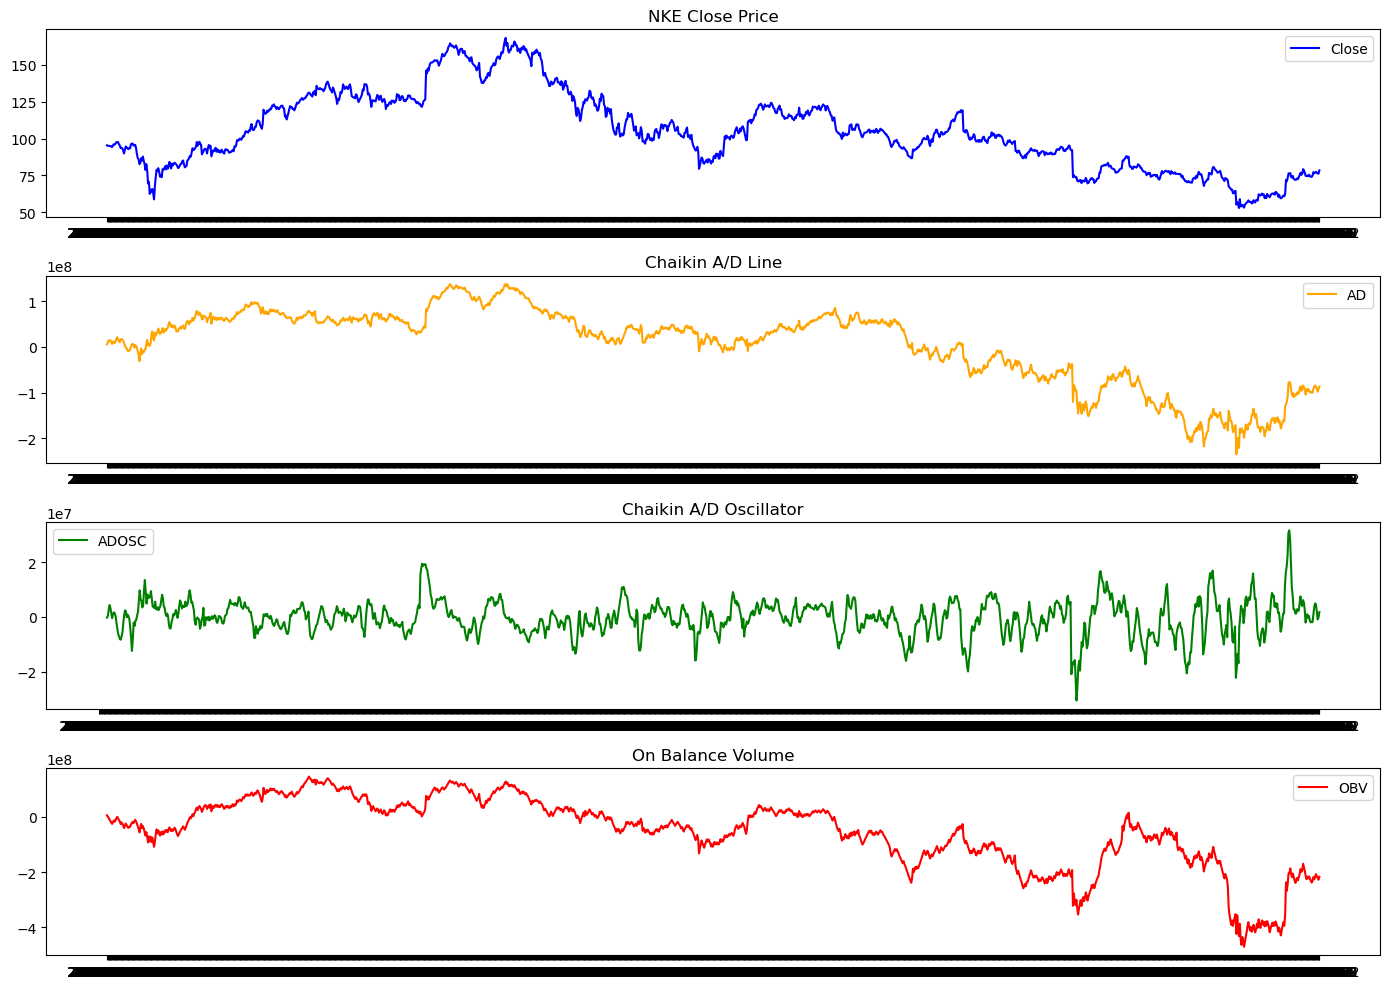

In [6]:
# plot of nke.Close, nke.AD, nke.ADOSC, nke.OBV
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(nke['Close'], label='Close', color='blue')
plt.title('NKE Close Price')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(nke['AD'], label='AD', color='orange')
plt.title('Chaikin A/D Line')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(nke['ADOSC'], label='ADOSC', color='green')
plt.title('Chaikin A/D Oscillator')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(nke['OBV'], label='OBV', color='red')
plt.title('On Balance Volume')
plt.legend()

plt.tight_layout()
plt.show()

### Volume Indicators: AD, ADOSC, OBV
- **AD (Chaikin Accumulation/Distribution Line):**
  The AD indicator combines price and volume to measure the cumulative flow of money into and out of a security. It helps identify whether a stock is being accumulated (bought) or distributed (sold) over time.
- **ADOSC (Chaikin A/D Oscillator):**
  The ADOSC is an oscillator derived from the AD line, showing the difference between fast and slow EMAs of the AD. It highlights short-term changes in accumulation/distribution and can signal potential trend reversals.
- **OBV (On Balance Volume):**
  OBV is a momentum indicator that uses volume flow to predict changes in stock price. It adds volume on up days and subtracts volume on down days, helping to confirm price trends or warn of possible reversals.

#### Example BUY (LONG) Entry Signals
- **AD/ADOSC:**
  - A BUY signal may occur when the ADOSC crosses above zero, indicating a shift toward accumulation and potential upward momentum.
  - A rising AD line, especially after a period of decline, can confirm accumulation and support a bullish entry.
- **OBV:**
  - A BUY signal may be generated when OBV breaks above a previous resistance level or starts making higher highs, confirming that volume is supporting the price advance.
  - If price consolidates while OBV rises, it may indicate accumulation and a possible breakout to the upside.